In [1]:
#from tangostationcontrol.statistics_writer.statistics_writer import main
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
from os import listdir
from os.path import isfile,join
from time import sleep

In [2]:

import gc
def loadSST(fn0,sis):
    D2=[]
    with h5py.File(fn0[:], 'r') as f:
      for s in f.keys():
#        try:
         D=np.array(f[s]['values'])
#         print(s,D.shape)
         D2.append(D[sis,:])
#        except:
#            continue;
    D2=np.array(D2)
    return D2
def loadSST2(fn0,sis,f1=0,f2=512):
    D2=[]
    with h5py.File(fn0[:], 'r') as f:
      for s in f.keys():
#        try:
         D=np.array(f[s]['values'])
#         print(s,D.shape)
         D2.append(D[sis,f1:f2])
#        except:
#            continue;
    D2=np.array(D2)
    return D2


In [4]:
dhours=[]
dcnt=[]
#opath='xst_mean'
fpath='sst'
if True:
    files=listdir(fpath)#[f for f in listdir(fpath)];
    files.sort()
    files = [f for f in files if isfile(join(fpath,f))]
    print(len(files),files[0])

71 SST_2022-07-08-15-22-46.h5


In [5]:
#sis=[i for i in range(8*3,10*3)] #rcu 8 and 9
sis=[24,25,26,27,28,29] #inputs set to 110-190 bands
nsi=len(sis)

D=loadSST('sst/'+files[0],sis)
print(D.shape)


(8, 6, 512)


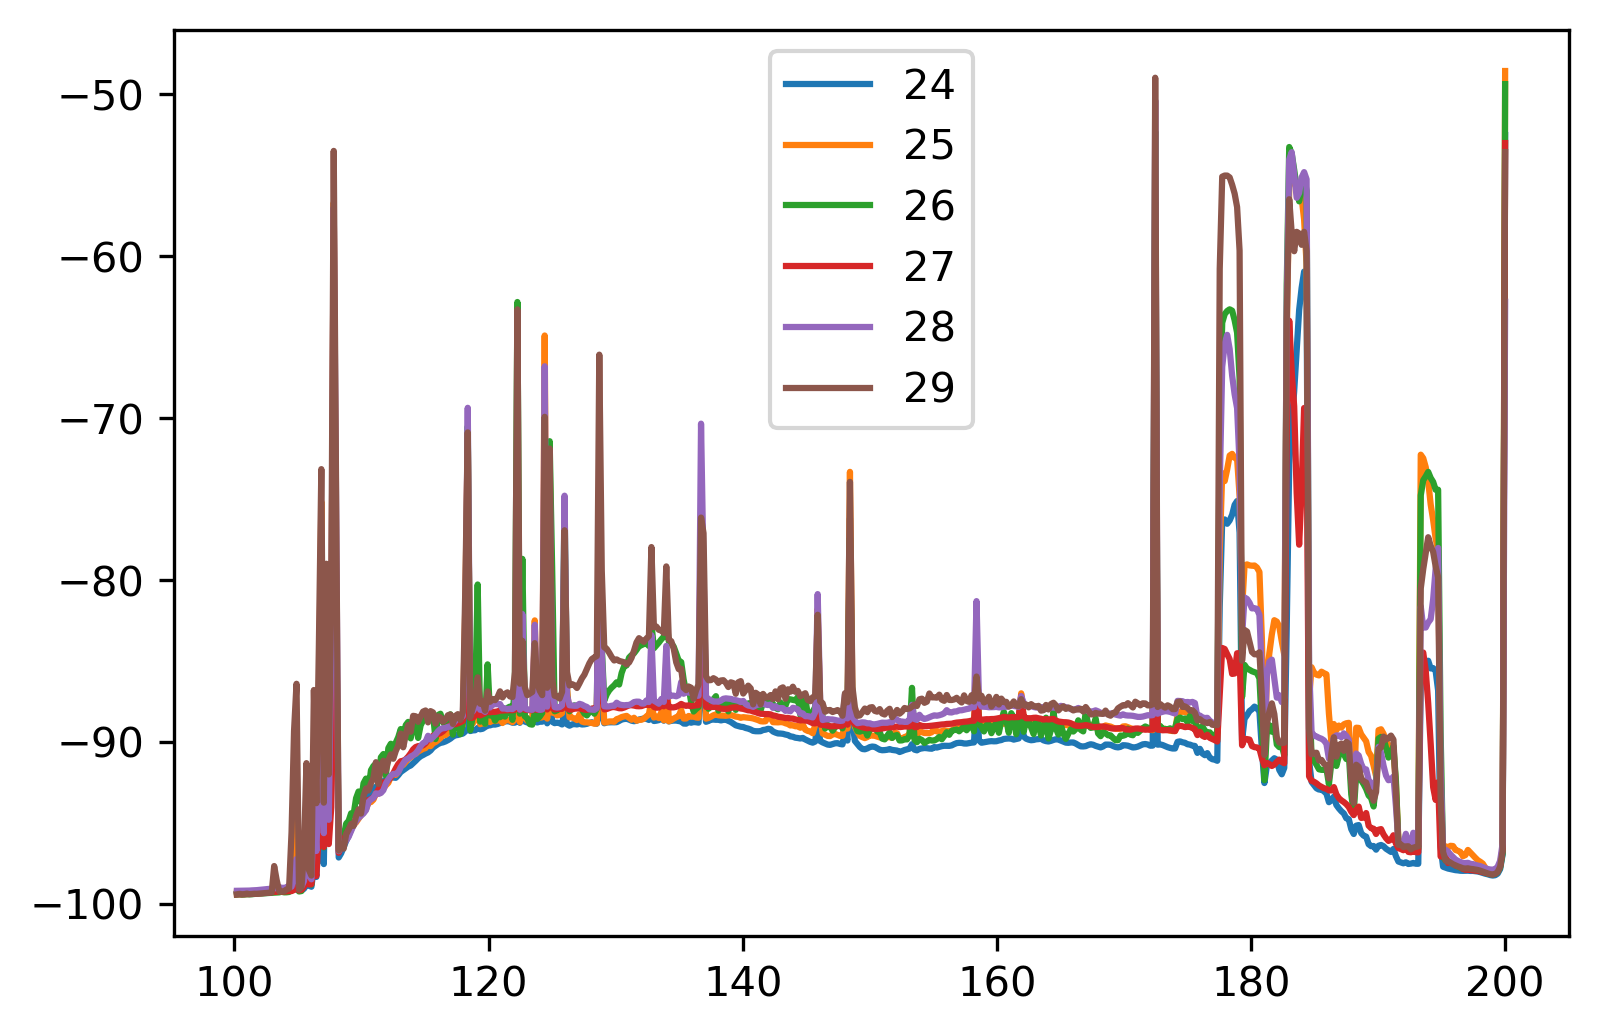

In [6]:
plt.figure(dpi=300)
Dm=np.percentile(D,50,axis=0)
freq=200-np.arange(512)/512*100
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
for i,si in enumerate(sis):
    plt.plot(freq,10*np.log10(Dm[i])-GainADC,label=str(si))
plt.legend()

In [74]:
datepass='2022-07-09'
#NOAA 18
timepass=21.129 # 137.91, 137.35
#timepass=7.9777 #NOAA 19 137.1,38
filepass=[]
filehr=[]
for c,x in enumerate(files):
    if x[4:14]!=datepass: continue;
    hr=int(x[15:17])+int(x[18:20])/60
#    print(hr)
    if (hr<timepass-10./60) and (hr+10./60+1>timepass): 
        filepass.append([c,x,hr])
print(filepass)

[[30, 'SST_2022-07-09-20-26-12.h5', 20.433333333333334]]


In [75]:
f1=137
f2=138
if1=np.argmin(np.abs(freq-f2))
if2=np.argmin(np.abs(freq-f1))
print("selected frequency band",freq[if1],freq[if2], ' number bands=',if2-if1+1)

selected frequency band 138.0859375 136.9140625  number bands= 7


In [76]:
D2=[]
T2=[]
for nr,f,hr in filepass:
    print(f)
    D=loadSST2('sst/'+f,sis,if1,if2+1)
    n1,n2,n3=D.shape
    print(D.shape)
    ssttime=hr+np.arange(n1)/3600;
#    D=np.percentile( D.reshape([n1//10,10,n2,n3]),50,axis=1) #minute 'averages'
#    print(D.shape)
    D2.append(D)
    T2.append(ssttime)

SST_2022-07-09-20-26-12.h5
(3600, 6, 7)


In [77]:
D2=np.array(D2)
T2=np.array(T2).flatten()
nD2=D2.shape;
D2=D2.reshape([nD2[0]*nD2[1],nD2[2],nD2[3]])

137.6953125


(21.029, 21.229000000000003)

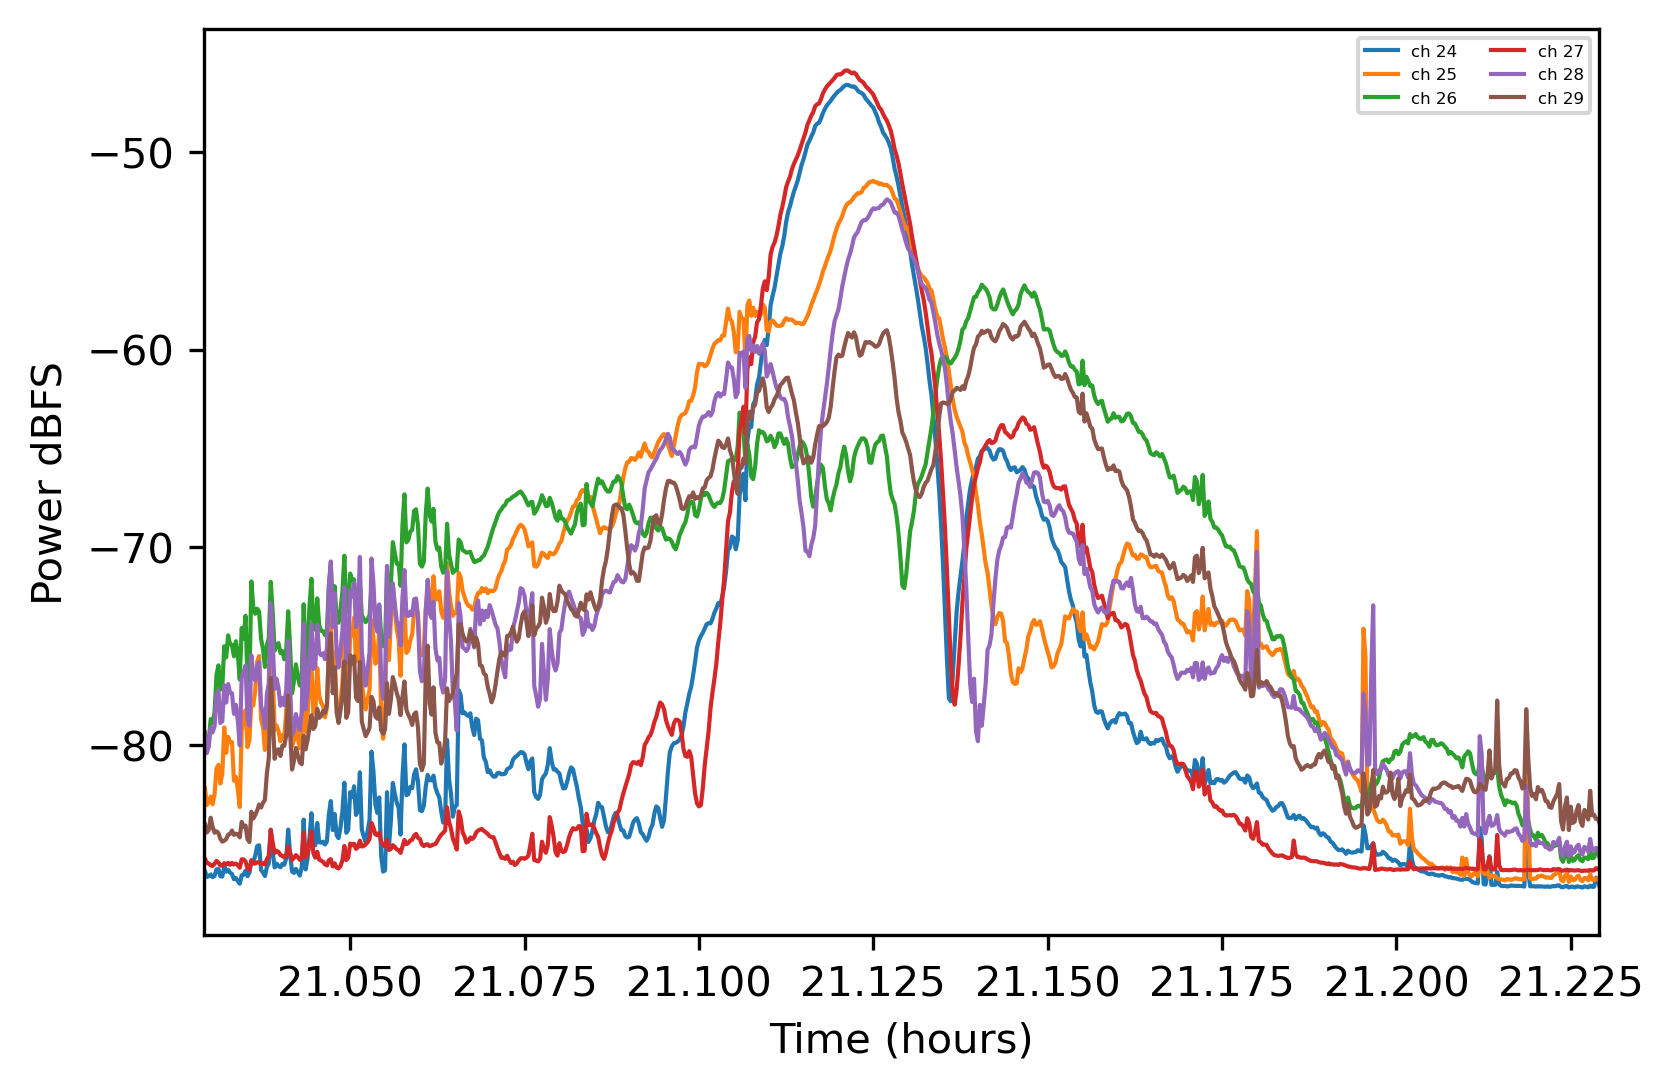

In [79]:
plt.figure(dpi=300)
#time=np.arange(D2.shape[0])/60+19.5
print(freq[if1+2])
for ch in range(6):
#    plt.gca().set_prop_cycle(None)
#    for i in range(if2-if1):
#        plt.plot(time,10*np.log10(D2[:,ch,i])-GainADC,linewidth=1,label=('%.1f MHz' % freq[if1+i] if ch==0 else ''))
    for i in [1]:
        plt.plot(T2,10*np.log10(D2[:,ch,i])-GainADC,linewidth=1,label='ch %i'%(ch+8*3))
#plt.ylim(70,80)

plt.legend(fontsize=4,ncol=2)
plt.xlabel("Time (hours)")
plt.ylabel("Power dBFS")
plt.xlim(timepass-0.1,timepass+0.1)
#plt.title("DTS-outside SST 137.9MHz band, "+datepass)